# Classification of the toy data using SVMs with different kernel choices (fig. 4.3)
## Author: Alexander Gresch

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC

In [3]:
# Import custom font
import matplotlib.font_manager as fm
from pathlib import Path

path_text = Path(r'../fonts/Hero New Regular.otf') # for text only
path_abc = r'../fonts/Hero New Medium.otf' # for (a), (b), etc.
custom_font = fm.FontProperties(fname=path_text)
custom_font_abc = fm.FontProperties(fname=path_abc)

In [4]:
# Import colors (e.g., as 1D and dictionary)
import pickle

# Use colors as a dictionary
infile = open('../colors/colors_dict.pkl','rb')
colors_dict = pickle.load(infile)
infile.close()

# Import 1D array of colors
infile = open('../colors/colors_1D.pkl','rb')
colors_1D = pickle.load(infile)
infile.close()


In [5]:
# derandomized data generation
N = 100
r = np.random.RandomState(42)
radii = np.zeros((2,N))
for i,rrange in enumerate(([0.1,0.8],[1.2,1.9])):
    radii[i] = r.uniform(*rrange,size=N)
angles  = r.uniform(0,2*np.pi,size=(2,N))

In [6]:
# processing of data through SVM
X,y = [], []
for i,(r,angl) in enumerate(zip(radii,angles)):
    temp = np.array([r*np.cos(angl),r*np.sin(angl)]).T
    X.append(temp)
    y.append(np.full(len(temp),i))
X = np.array(X).reshape((-1,2))
y = np.array(y,dtype=int).flatten()

linear, poly, rbf = SVC(kernel="linear", C=1), SVC(kernel="poly",degree=50, C=0.5), SVC(gamma=1, C=0.5)

xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))


In [7]:
col = {i: color["dark"] for i,color in enumerate(colors_dict.values())}

C:\Users\ankad\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
'Hero New Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'Hero New Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


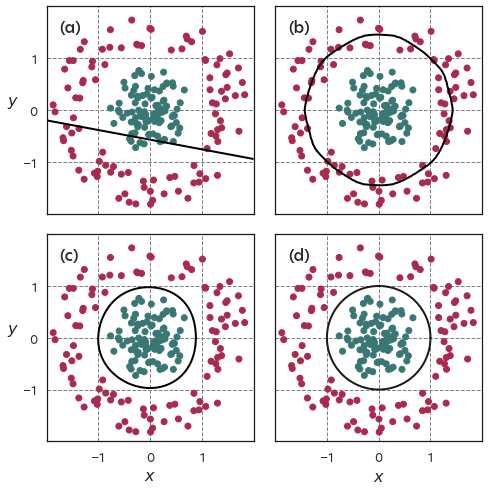

In [11]:
# Seaborn style set
sns.set(style="whitegrid", rc={'figure.figsize':(5.25,3.375)}) # in inches
sns.set_style("whitegrid", {'grid.linestyle': 'dashed', "grid.color": "0.5", 'axes.edgecolor': '.1'})

plt.figure(figsize=(8,8))
for i,clf in enumerate((linear,poly,rbf)):
    ax = plt.subplot(221+i)
    plt.scatter(X[:,0],X[:,1],c=[col[i] for i in y])
    clf.fit(X, y)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
    plt.xlim(-2,2)
    if i<2:
        plt.xticks(ticks=[-1,0,1], fontsize=11, labels=[], font=path_text)
    else:
        plt.xlabel("$x$",fontsize=16)
        plt.xticks(ticks=[-1,0,1], fontsize=11, font=path_text)
    plt.ylim(-2,2)
    if i%2==0:
        plt.ylabel("$y$",fontsize=16,fontproperties=custom_font,rotation=0,ha="right")
        plt.yticks(ticks=[-1,0,1], fontsize=11, font=path_text)
    else:
        plt.yticks(ticks=[-1,0,1], fontsize=11, labels=[], font=path_text)
    plt.text(-1.75,1.5,"("+chr(ord("a")+i)+")",fontsize=16,fontproperties=custom_font_abc)
    plt.gca().set_aspect('equal')
plt.subplot(224)
plt.scatter(X[:,0],X[:,1],c=[col[i] for i in y])
angle = np.linspace(0,2*np.pi,100)
plt.plot(np.cos(angle),np.sin(angle),"k-",linewidth=2)
plt.xlim(-2,2)
plt.xlabel("$x$",fontsize=16,fontproperties=custom_font,rotation=0)
plt.xticks(ticks=[-1,0,1], fontsize=11, font=path_text)
plt.ylim(-2,2)
plt.yticks(ticks=[-1,0,1], fontsize=11, labels=[], font=path_text)
plt.text(-1.75,1.5,"(d)",fontsize=16,fontproperties=custom_font_abc)
plt.gca().set_aspect('equal')
plt.subplots_adjust(wspace=0.05,hspace=0.1)
plt.savefig("4.3_kernel_trick_comparison_corr.pdf",orientation="landscape",dpi=600,bbox_inches="tight")
plt.show()